# Graph-based image processing and analysis - Lab
**Master 2 GeoData Science**


## Introduction
The purpose of this lab is to experiment some graph-based tools for image processing that have been seen in Lecture (part 1). For this lab, we will work with the **Scikit-image** library.

Before starting, let mount your drive to allow Colab to acess to your Google Drive (for e.g., reading/writing images)

In [ ]:
# mount drive to allow Colab to access to your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


### **Exo 1: Compute the Adjacecy matrix, Degree matrix and Laplacian Matrix from a given graph**

Read and show the *graph_exe.png* image from your Drive as follows:

Text(0.5, 1.0, 'A weighted graph')

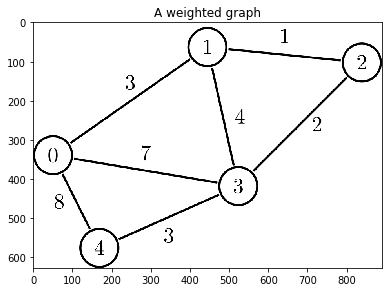

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
img = io.imread('/content/gdrive/My Drive/Colab notebooks/img_graph/graph_exe.png')
plt.figure(0)
io.imshow(img)
plt.title('A weighted graph')


1) Implement the adjacency matrix (W) using *numpy.array*




In [ ]:
import numpy as np

#W = np.array()

# you need to enter the adjacency matrix (manually)



# print(W)


2) Now compute the Degree matrix (D) and the Laplacian matrix (L) from W

In [ ]:
# Degree matrix D

# compute from W



# print(D)

In [ ]:
# Laplacian matrix L

# compute from D and W


# print(L)

### **Exo 2: Contruct a regular graph from an image**

Read and visualize the two following images
- img1: the *coffee* image from skimage data (need to import data package)
- img2: the *intersection94.jpg* image from your Drive


Text(0.5, 1.0, 'Intersection')

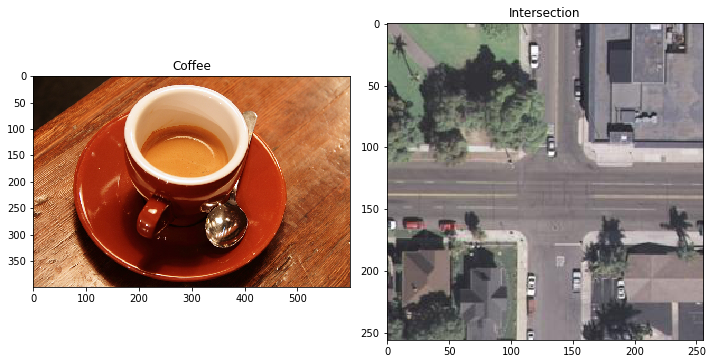

In [ ]:
# read img1 and img2
from skimage import data
img1 = data.coffee()

img2 = io.imread('/content/gdrive/My Drive/Colab notebooks/img_graph/intersection94.jpg')


# show them side by side use subplot
plt.figure(figsize = (10,12))
plt.subplot(121)
io.imshow(img1)
plt.title("Coffee")

plt.subplot(122)
io.imshow(img2)
plt.title("Intersection")



Now, imagine we would like to construct a regular graph (4-connected) on each of the images (named *G1* and *G2*)

1) What are the number of nodes? number of edges of a graph contructed from an image of size NxM ?


In [ ]:
# your answer

# number of nodes = N*M

# number of edges = N*(M-1) + M*(N-1)




2) Calculate the number of nodes and number of edges of G1 and G2.

In [ ]:
# your answer

# Compute with the the size of each image


### **Exo 3: Now we would like to construct a region adjacency graph (RAG) from superpixels. Let's follow the tutorial.**

1) Perform SLIC super-pixel segmentation using the *segmentation.slic* method with parameters
- compactness 20
- number of segments 400

Required packages: *segmentation, color*

In [ ]:
# Generate super-pixels

from skimage import segmentation, color
# labels_sp1 from img1
labels_sp1 = segmentation.slic(img1, compactness=20, n_segments=400)

# labels_sp2 from img2
labels_sp2 = segmentation.slic(img2, compactness=20, n_segments=400)



Print the number of super-pixels from each one using *np.unique*


In [ ]:
# Print the number of super-pixels

print("Number of SPs from image 1 = ", np.size(np.unique(labels_sp1)))

print("Number of SPs from image 2 = ", np.size(np.unique(labels_sp2)))

Number of SPs from image 1 =  390
Number of SPs from image 2 =  388


In [ ]:
# Your remark





Text(0.5, 1.0, 'super-pixels with mean color')

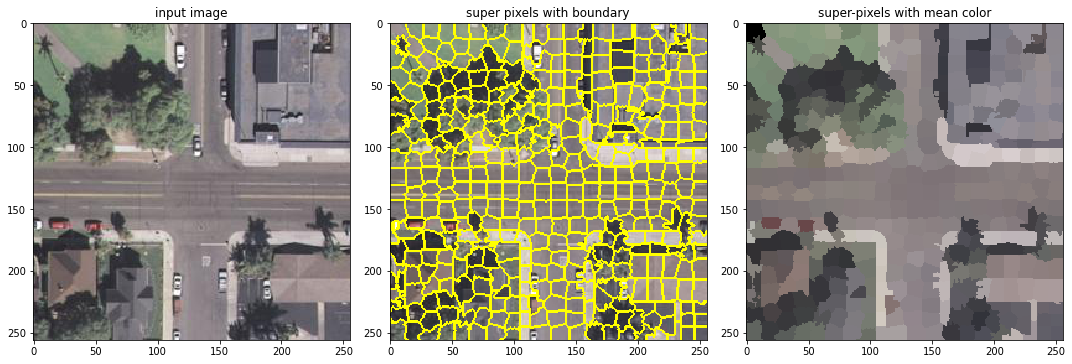

In [ ]:
# visualize the super-pixels with *segmentation.mark_boundaries* and *color.label2rgb*

img_in = img2
labels_in = labels_sp2

img_out1 = segmentation.mark_boundaries(img_in, labels_in)
img_out2 = color.label2rgb(labels_in, img_in, kind='avg', bg_label=0)

plt.figure(figsize = (15,20)) # avec subplot
plt.subplot(131)
io.imshow(img_in)
plt.title("input image")

plt.subplot(132)
io.imshow(img_out1)
plt.title("super pixels with boundary")

plt.subplot(133)
io.imshow(img_out2)
plt.title("super-pixels with mean color")

2) Construct a RAG based on the super-pixels using the *graph.rag_mean_color* method

Required packages: *graph*

In [ ]:
# Graph construction from super-pixels
from skimage.future import graph

# rag1 =
rag1 = graph.rag_mean_color(img1, labels_sp1, mode='similarity')

# rag2 =
rag2 = graph.rag_mean_color(img2, labels_sp2, mode='similarity')


Print the number of nodes and number of edges from each graph. Your remarks?

In [ ]:
# Number of nodes


# Number of edges

print(rag1.number_of_edges())

print(rag2.number_of_edges())


1095
1107


In [ ]:
# your remarks




3) Perform Graph-cut algorithm (Normalized Cut) from the constructed graph using the *graph.cut_normalized* method

In [ ]:
# Perform graph-cut

# labels_gcut1 =
labels_gcut1 = graph.cut_normalized(labels_sp1, rag1)


# labels_gcut2 =
labels_gcut2 = graph.cut_normalized(labels_sp2, rag2)


Visualize the segmentation results

Text(0.5, 1.0, 'segmentation result')

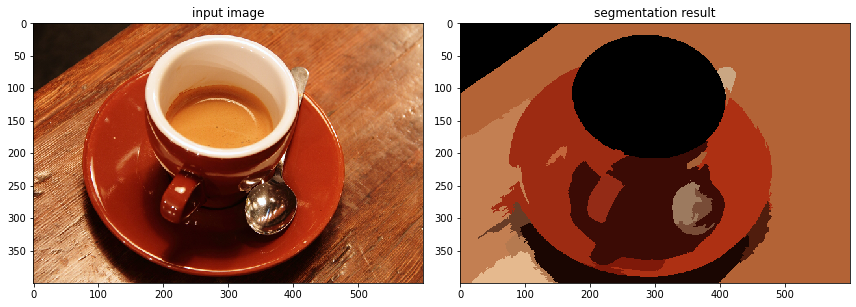

In [ ]:
# visualization the segmentation results
img_in = img1
labels_in = labels_gcut1

img_out = color.label2rgb(labels_in, img_in, kind='avg', bg_label=0)

plt.figure(figsize = (12,16))
plt.subplot(121)
io.imshow(img_in)
plt.title("input image")

plt.subplot(122)
io.imshow(img_out)
plt.title("segmentation result")

What are the number of segments from each segmented image?


In [ ]:
# your response

print("Number of segments from image 1 = ", np.size(np.unique(labels_gcut1)))


print("Number of segments from image 2 = ", np.size(np.unique(labels_gcut2)))

Number of segments from image 1 =  18
Number of segments from image 2 =  32
